In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('data_Jamu_setelah_oversampling.csv', header=None)
del df[0]
df.head(3)

,1,2,3,4,5,6,7,8,9,10,...,457,458,459,460,461,462,463,464,465,466
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,0:465]
Y = df.iloc[:,465:]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

<AxesSubplot:xlabel='466', ylabel='count'>

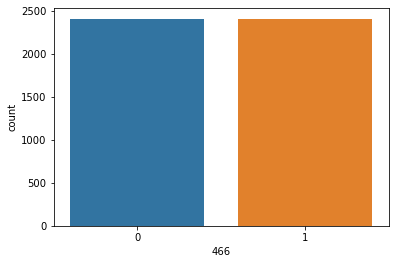

In [7]:
sns.countplot(x = 466, data=df)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [12]:
# dummy_y = np_utils.to_categorical(y)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
# Reshaping untuk variabel x_train dan x_test

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 2))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

C:\Users\Kamal Nasution\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 250, validation_data=(x_test, y_test))

Epoch 1/200
16/16 [==============================] - 13s 724ms/step - loss: 0.3000 - accuracy: 0.4943 - val_loss: 0.2265 - val_accuracy: 0.5508
Epoch 2/200
16/16 [==============================] - 12s 734ms/step - loss: 0.2076 - accuracy: 0.5161 - val_loss: 0.2149 - val_accuracy: 0.4564
Epoch 3/200
16/16 [==============================] - 12s 736ms/step - loss: 0.1852 - accuracy: 0.5036 - val_loss: 0.1710 - val_accuracy: 0.4595
Epoch 4/200
16/16 [==============================] - 12s 767ms/step - loss: 0.1670 - accuracy: 0.4798 - val_loss: 0.1589 - val_accuracy: 0.4305
Epoch 5/200
16/16 [==============================] - 12s 747ms/step - loss: 0.1614 - accuracy: 0.4857 - val_loss: 0.1578 - val_accuracy: 0.4263
Epoch 6/200
16/16 [==============================] - 12s 728ms/step - loss: 0.1440 - accuracy: 0.5093 - val_loss: 0.1625 - val_accuracy: 0.4523
Epoch 7/200
16/16 [==============================] - 12s 736ms/step - loss: 0.1389 - accuracy: 0.4982 - val_loss: 0.1531 - val_accuracy:

16/16 [==============================] - 12s 754ms/step - loss: 0.1043 - accuracy: 0.5062 - val_loss: 0.1465 - val_accuracy: 0.5467
Epoch 114/200
16/16 [==============================] - 12s 755ms/step - loss: 0.1046 - accuracy: 0.4961 - val_loss: 0.1427 - val_accuracy: 0.4876
Epoch 115/200
16/16 [==============================] - 12s 764ms/step - loss: 0.1042 - accuracy: 0.5075 - val_loss: 0.1532 - val_accuracy: 0.5851
Epoch 116/200
16/16 [==============================] - 12s 755ms/step - loss: 0.1070 - accuracy: 0.5122 - val_loss: 0.1366 - val_accuracy: 0.6380
Epoch 117/200
16/16 [==============================] - 12s 754ms/step - loss: 0.1071 - accuracy: 0.4974 - val_loss: 0.1520 - val_accuracy: 0.6400
Epoch 118/200
16/16 [==============================] - 12s 754ms/step - loss: 0.1069 - accuracy: 0.4992 - val_loss: 0.1454 - val_accuracy: 0.5218
Epoch 119/200
16/16 [==============================] - 12s 754ms/step - loss: 0.1051 - accuracy: 0.4912 - val_loss: 0.1548 - val_accuracy:

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 461, 150)          900       
_________________________________________________________________
dropout (Dropout)            (None, 461, 150)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 457, 100)          75100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 457, 100)          0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 453, 50)           25050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 453, 50)           0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 449, 50)           1

In [21]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred = model.predict(x_test)
print(y_pred)

------------Prediksi dari variabel test------------------
[[0.63983655 0.6428419 ]
 [0.06494853 0.06030734]
 [0.8987915  0.9003138 ]
 ...
 [0.8677811  0.87040836]
 [0.5326368  0.5333999 ]
 [0.11796366 0.1197274 ]]


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred.round())

ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

In [23]:
#Import scikit-learn metrics module for accuracy calculation #DC 1100
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("F1:",metrics.f1_score(y_test, y_pred.round(), average='weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred.round() ,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred.round(), average='weighted'))

ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

Ket:

    Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
    Recall: merupakan gambaran dari keberhasilan suatu algoritma.
    F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.



In [38]:
print("Tingkat Akurasi Data Train Di CNN :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di CNN :", model.evaluate(x_test, y_test))

66/66 [==============================] - 1s 19ms/step - loss: 0.1200 - accuracy: 0.8597
Tingkat Akurasi Data Train Di CNN : [0.12004970759153366, 0.8596574664115906]
33/33 [==============================] - 1s 19ms/step - loss: 0.2403 - accuracy: 0.6651
Tingkat Akurasi Data Test Di CNN : [0.24033978581428528, 0.665057897567749]


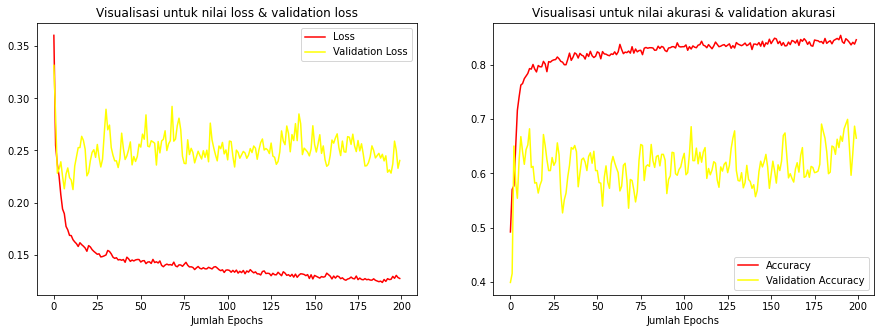

In [39]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai akurasi & validation akurasi")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

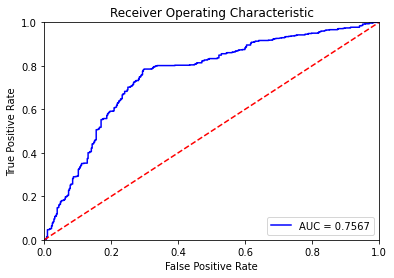

In [40]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

def cnn_model(batch_size, epoch, kernel_size, learning_rate, activation) :
  # Membuat jaringan syarat tiruan untuk model CNN
  model = Sequential()
  
  # Menambah layer CNN yang pertama dan Dropout regularisation
  model.add(Conv1D(filters=150, kernel_size=kernel_size, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dropout(0.2))
  
  # Menambah layer CNN yang kedua dan Dropout regularisation
  model.add(Conv1D(filters=100, kernel_size=kernel_size, activation=activation, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dropout(0.2))
  
  # Menambah layer CNN yang ketiga dan Dropout regularisation
  model.add(Conv1D(filters=50, kernel_size=kernel_size, activation=activation, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dropout(0.2))
  
  # Menambah layer CNN yang keempat dan Dropout regularisation
  model.add(Conv1D(filters=50, kernel_size=kernel_size, activation=activation, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(MaxPool1D(pool_size=2))
  model.add(Flatten())

  # Menambah layer output dan dropout regularisation
  model.add(Dense(units = 1))

  # Melihat rancangan network CNN yang telah dibuat
  #model.summary()

  opt = Adam(lr=learning_rate)
  
  # Compile CNN dengan nilai opt, loss, dan matrics
  model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

  return model

In [42]:
# Create the model
model = KerasClassifier(build_fn = cnn_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epoch = [150,200,250]
kernel_size = [5,10,50]
learning_rate = [0.001,0.01,0.1]
activation = ['softmax','relu','tanh','sigmoid']

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epoch = epoch,kernel_size=kernel_size, learning_rate = learning_rate,
                   activation = activation)

nn_random = RandomizedSearchCV(estimator = model, param_distributions = param_grids, n_iter = 5, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model

In [44]:
result = nn_random.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  5.7min remaining:   29.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.9min finished


In [45]:
print(nn_random.best_score_)
print(nn_random.best_params_)
print(nn_random.best_estimator_)

0.5018391489982605
{'learning_rate': 0.001, 'kernel_size': 5, 'epoch': 200, 'batch_size': 40, 'activation': 'softmax'}


In [ ]:
# coba menggunakan activasi sgmd untuk mencegah overfit

In [60]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='sigmoid', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='sigmoid', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='sigmoid', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='sigmoid', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

In [61]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 250, validation_data=(x_test, y_test))

Epoch 1/10
11/11 [==============================] - 8s 711ms/step - loss: 8.4507 - accuracy: 0.4900 - val_loss: 1.6118 - val_accuracy: 0.6115
Epoch 2/10
11/11 [==============================] - 8s 698ms/step - loss: 1.5046 - accuracy: 0.5620 - val_loss: 0.4163 - val_accuracy: 0.3885
Epoch 3/10
11/11 [==============================] - 8s 747ms/step - loss: 0.3955 - accuracy: 0.5319 - val_loss: 0.2446 - val_accuracy: 0.6115
Epoch 4/10
11/11 [==============================] - 8s 769ms/step - loss: 0.2947 - accuracy: 0.4799 - val_loss: 0.3108 - val_accuracy: 0.3885
Epoch 5/10
11/11 [==============================] - 10s 876ms/step - loss: 0.2591 - accuracy: 0.5394 - val_loss: 0.2519 - val_accuracy: 0.3885
Epoch 6/10
11/11 [==============================] - 9s 782ms/step - loss: 0.2515 - accuracy: 0.5569 - val_loss: 0.2921 - val_accuracy: 0.3885
Epoch 7/10
11/11 [==============================] - 9s 783ms/step - loss: 0.2503 - accuracy: 0.5594 - val_loss: 0.2614 - val_accuracy: 0.3885
Epoch

In [62]:
# X dan y

,1,2,3,4,5,6,7,8,9,10,...,456,457,458,459,460,461,462,463,464,465
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3134,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [68]:
dummy_y = np_utils.to_categorical(Y)

In [70]:
z = np.argmax(dummy_y, axis=-1)

In [71]:
z

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import StratifiedKFold

In [73]:
from sklearn import model_selection

validation_size = 0.1
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, dummy_y, test_size=validation_size, random_state=seed)

In [75]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=463,kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))
for i in range(0, 6):
    model.add(Dense(units=463, kernel_initializer='normal',bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.4))

model.add(Dense(units=2))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=24,epochs=30,verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/30
118/118 [==============================] - 2s 8ms/step - loss: 0.6464 - accuracy: 0.6178 - val_loss: 0.5407 - val_accuracy: 0.7548
Epoch 2/30
118/118 [==============================] - 1s 7ms/step - loss: 0.4479 - accuracy: 0.8208 - val_loss: 0.5373 - val_accuracy: 0.7389
Epoch 3/30
118/118 [==============================] - 1s 7ms/step - loss: 0.3587 - accuracy: 0.8534 - val_loss: 0.5525 - val_accuracy: 0.7707
Epoch 4/30
118/118 [==============================] - 1s 7ms/step - loss: 0.2649 - accuracy: 0.8973 - val_loss: 0.7082 - val_accuracy: 0.7548
Epoch 5/30
118/118 [==============================] - 1s 7ms/step - loss: 0.2117 - accuracy: 0.9110 - val_loss: 0.7797 - val_accuracy: 0.7357
Epoch 6/30
118/118 [==============================] - 1s 7ms/step - loss: 0.1587 - accuracy: 0.9435 - val_loss: 0.8980 - val_accuracy: 0.7325
Epoch 7/30
118/118 [==============================] - 1s 7ms/step - loss: 0.1467 - accuracy: 0.9432 - val_loss: 1.0579 - val_accuracy: 0.7516
Epoch 